## Introduction

Airbnb is an online marketplace for arranging or offering lodging, primarily homestays, or tourism experiences since 2008. NYC is the most populous city in the United States and also one of the most popular tourism and business place in the world.

Airbnb NYC 2019 data contains listing activity and metrics. In this kernel, I would like to choose the best prediction model for price. Meanwhile, price feature's relationship examines with others and some data exploratory analysis will be made.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import norm
from scipy import stats
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

#model selection
from sklearn.model_selection import train_test_split,cross_validate
from sklearn.preprocessing import MinMaxScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import ExtraTreesClassifier

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet

from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.metrics import r2_score

In [2]:
nyc_data = pd.read_csv('AB_NYC_2019.csv')

In [3]:
nyc_data.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,19-10-2018,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,21-05-2019,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,05-07-2019,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,19-11-2018,0.10,1,0


In [4]:
nyc_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

In [5]:
nyc_data.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [6]:
#dropping columns that are not significant or could be unethical to use for our future data exploration and predictions
nyc_data.drop(['name','host_name','last_review'], axis=1, inplace=True)


In [7]:
nyc_data.isnull().sum()

id                                    0
host_id                               0
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

In [8]:
#replacing all NaN values in 'reviews_per_month' with 0
nyc_data.fillna({'reviews_per_month':0}, inplace=True)
#examing changes
nyc_data.reviews_per_month.isnull().sum()

0

In [9]:
nyc_data.isnull().sum()

id                                0
host_id                           0
neighbourhood_group               0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [10]:
#let's proceed with examing some interesting categorical unique values
#examining the unique values of n_group as this column will appear very handy for later analysis

nyc_data.neighbourhood_group.unique()

array(['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx'],
      dtype=object)

In [11]:
#learning about unique values


len(nyc_data.neighbourhood.unique())

221

## Exploratory Data Analysis 

In [12]:
#we will skip first column for now and begin from host_id

#let's see what hosts (IDs) have the most listings on Airbnb platform and taking advantage of this service
top_host=nyc_data.host_id.value_counts().head(10)

top_host

219517861    327
107434423    232
30283594     121
137358866    103
12243051      96
16098958      96
61391963      91
22541573      87
200380610     65
7503643       52
Name: host_id, dtype: int64

In [13]:
#coming back to our dataset we can confirm our fidnings with already existing column called 'calculated_host_listings_count'
top_host_check=nyc_data.calculated_host_listings_count.max()
top_host_check

327

In [14]:
top_host_df=pd.DataFrame(top_host)
top_host_df.reset_index(inplace=True)
top_host_df.rename(columns={'index':'host_id', 'host_id':'P_Count'}, inplace=True)
top_host_df

,host_id,P_Count
0,219517861,327
1,107434423,232
2,30283594,121
3,137358866,103
4,12243051,96
5,16098958,96
6,61391963,91
7,22541573,87
8,200380610,65
9,7503643,52


Another graph is about price vs number of reviews based on neighborhood group. It shows us the lowest prices have higher reviews than the higher prices. It shows negative correlation between price and number of reviews. Also Manhattan, Brooklyn and Queens areas have higher reviews than others.

Text(0.5, 1.0, 'Price vs Number of Reviews vs Neighbourhood Group')

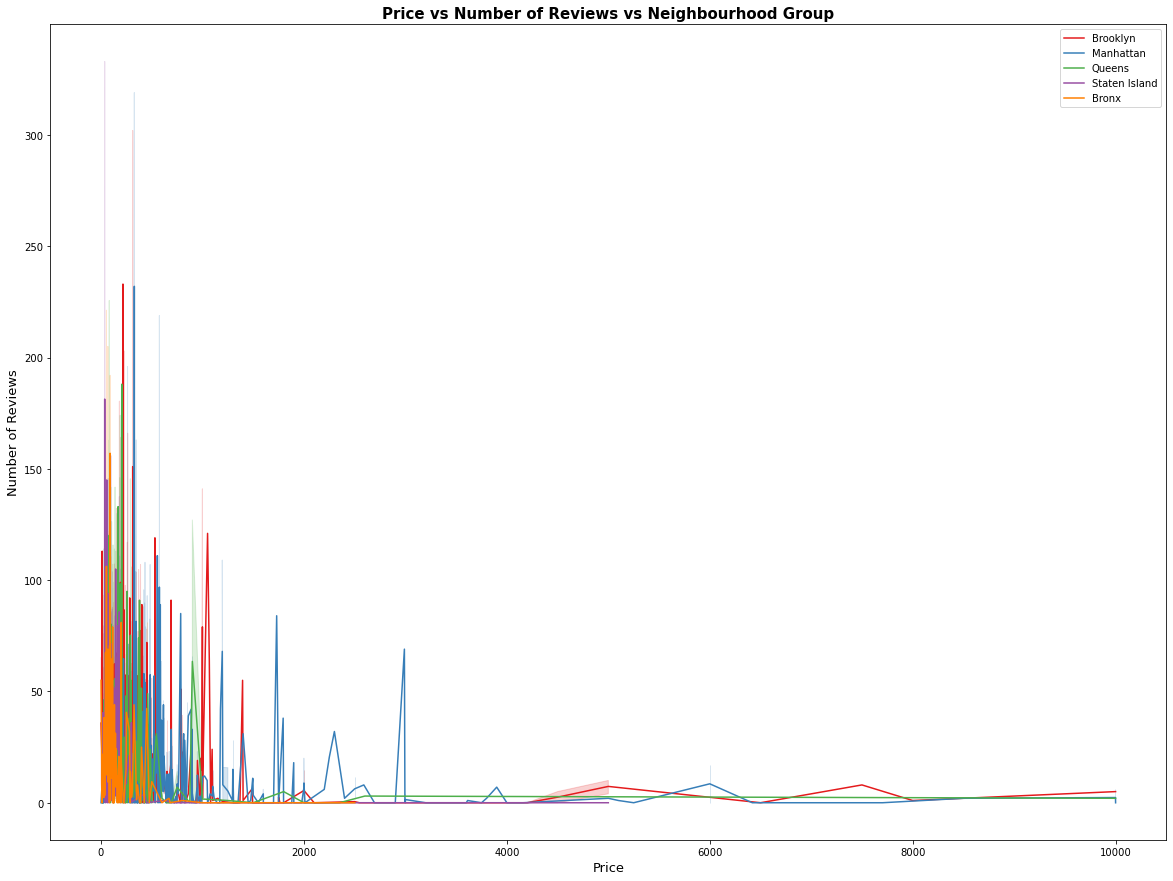

In [15]:
plt.figure(figsize=(20,15))
sns.set_palette("Set1")

sns.lineplot(x='price', y='number_of_reviews', 
             data=nyc_data[nyc_data['neighbourhood_group']=='Brooklyn'],
             label='Brooklyn')
sns.lineplot(x='price', y='number_of_reviews', 
             data=nyc_data[nyc_data['neighbourhood_group']=='Manhattan'],
             label='Manhattan')
sns.lineplot(x='price', y='number_of_reviews', 
             data=nyc_data[nyc_data['neighbourhood_group']=='Queens'],
             label='Queens')
sns.lineplot(x='price', y='number_of_reviews', 
             data=nyc_data[nyc_data['neighbourhood_group']=='Staten Island'],
             label='Staten Island')
sns.lineplot(x='price', y='number_of_reviews', 
             data=nyc_data[nyc_data['neighbourhood_group']=='Bronx'],
             label='Bronx')
plt.xlabel("Price", size=13)
plt.ylabel("Number of Reviews", size=13)
plt.title("Price vs Number of Reviews vs Neighbourhood Group",size=15, weight='bold')

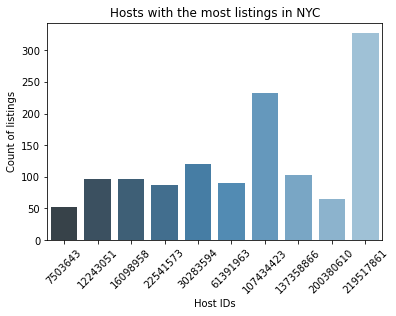

In [16]:
viz_1=sns.barplot(x="host_id", y="P_Count", data=top_host_df,
                 palette='Blues_d')
viz_1.set_title('Hosts with the most listings in NYC')
viz_1.set_ylabel('Count of listings')
viz_1.set_xlabel('Host IDs')
viz_1.set_xticklabels(viz_1.get_xticklabels(), rotation=45)
plt.show()

Interesting, we can see that there is a good distribution between top 10 hosts with the most listings. First host has more than 300+ listings.

In [17]:
#let's find out more about our neiberhoods presented 'Brooklyn', 'Manhattan', 'Queens', 'Staten Island', and 'Bronx'

#Brooklyn
sub_1=nyc_data.loc[nyc_data['neighbourhood_group'] == 'Brooklyn']
price_sub1=sub_1[['price']]
#Manhattan
sub_2=nyc_data.loc[nyc_data['neighbourhood_group'] == 'Manhattan']
price_sub2=sub_2[['price']]
#Queens
sub_3=nyc_data.loc[nyc_data['neighbourhood_group'] == 'Queens']
price_sub3=sub_3[['price']]
#Staten Island
sub_4=nyc_data.loc[nyc_data['neighbourhood_group'] == 'Staten Island']
price_sub4=sub_4[['price']]
#Bronx
sub_5=nyc_data.loc[nyc_data['neighbourhood_group'] == 'Bronx']
price_sub5=sub_5[['price']]
#putting all the prices' dfs in the list
price_list_by_n=[price_sub1, price_sub2, price_sub3, price_sub4, price_sub5]

In [18]:
#creating an empty list that we will append later with price distributions for each neighbourhood_group
p_l_b_n_2=[]
#creating list with known values in neighbourhood_group column
nei_list=['Brooklyn', 'Manhattan', 'Queens', 'Staten Island', 'Bronx']
#creating a for loop to get statistics for price ranges and append it to our empty list
for x in price_list_by_n:
    i=x.describe(percentiles=[.25, .50, .75])
    i=i.iloc[3:]
    i.reset_index(inplace=True)
    i.rename(columns={'index':'Stats'}, inplace=True)
    p_l_b_n_2.append(i)
#changing names of the price column to the area name for easier reading of the table    
p_l_b_n_2[0].rename(columns={'price':nei_list[0]}, inplace=True)
p_l_b_n_2[1].rename(columns={'price':nei_list[1]}, inplace=True)
p_l_b_n_2[2].rename(columns={'price':nei_list[2]}, inplace=True)
p_l_b_n_2[3].rename(columns={'price':nei_list[3]}, inplace=True)
p_l_b_n_2[4].rename(columns={'price':nei_list[4]}, inplace=True)
#finilizing our dataframe for final view    
stat_df=p_l_b_n_2
stat_df=[df.set_index('Stats') for df in stat_df]
stat_df=stat_df[0].join(stat_df[1:])
stat_df

,Brooklyn,Manhattan,Queens,Staten Island,Bronx
Stats,,,,,
min,0.0,0.0,10.0,13.0,0.0
25%,60.0,95.0,50.0,50.0,45.0
50%,90.0,150.0,75.0,75.0,65.0
75%,150.0,220.0,110.0,110.0,99.0
max,10000.0,10000.0,10000.0,5000.0,2500.0


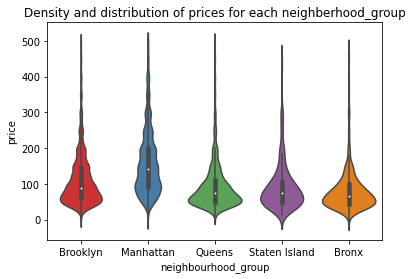

In [19]:
#we can see from our statistical table that we have some extreme values, therefore we need to remove them for the sake of a better visualization

#creating a sub-dataframe with no extreme values / less than 500
sub_6=nyc_data[nyc_data.price < 500]

#using violinplot to showcase density and distribtuion of prices, 
#the violin plot represent a higher probability that members

viz_2=sns.violinplot(data=sub_6, x='neighbourhood_group', y='price')
viz_2.set_title('Density and distribution of prices for each neighberhood_group')
plt.show()

Great, with a statistical table and a violin plot we can definitely observe a couple of things about distribution of prices for Airbnb in NYC boroughs. First, we can state that Manhattan has the highest range of prices for the listings with $150 price as average observation, followed by Brooklyn with \$90 per night. Queens and Staten Island appear to have very similar distributions, Bronx is the cheapest of them all. This distribution and density of prices were completely expected; for example, as it is no secret that Manhattan is one of the most expensive places in the world to live in, where Bronx on other hand appears to have lower standards of living.

In [20]:
#as we saw earlier from unique values for neighbourhood there are way too many to concentrate on;
#therefore, let's grab just top 10 neighbourhoods that have the most listings in them

#finding out top 10 neighbourhoods
nyc_data.neighbourhood.value_counts().head(10)

Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
Hell's Kitchen        1958
East Village          1853
Upper East Side       1798
Crown Heights         1564
Midtown               1545
Name: neighbourhood, dtype: int64

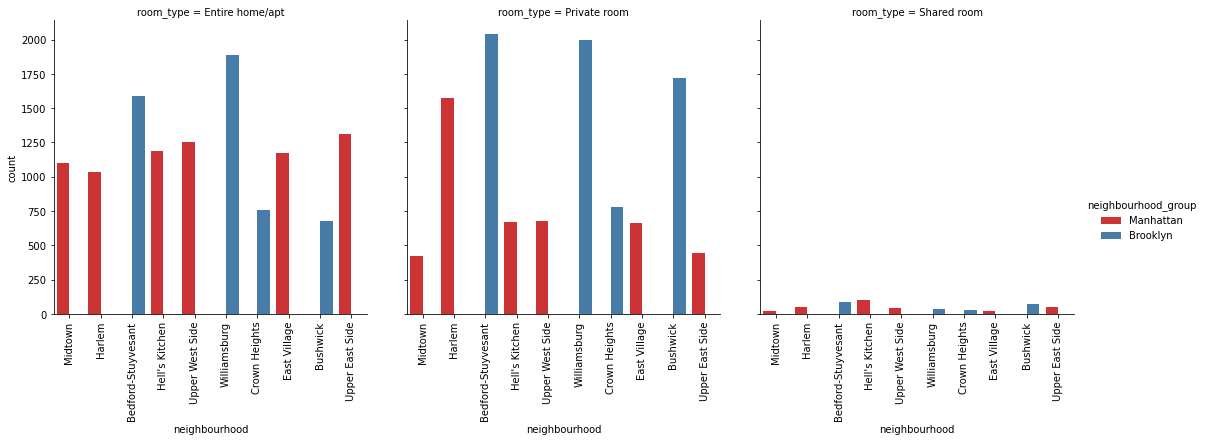

In [21]:
#let's now combine this with our neighbourhood and room type for a rich visualization we can make

#grabbing top 10 neighbourhoods for sub-dataframe

sub_7=nyc_data.loc[nyc_data['neighbourhood'].isin(['Williamsburg','Bedford-Stuyvesant','Harlem','Bushwick',
                 'Upper West Side','Hell\'s Kitchen','East Village','Upper East Side','Crown Heights','Midtown'])]
#using catplot to represent multiple interesting attributes together and a count
viz_3=sns.catplot(x='neighbourhood', hue='neighbourhood_group', col='room_type', data=sub_7, kind='count')
viz_3.set_xticklabels(rotation=90)
plt.show()

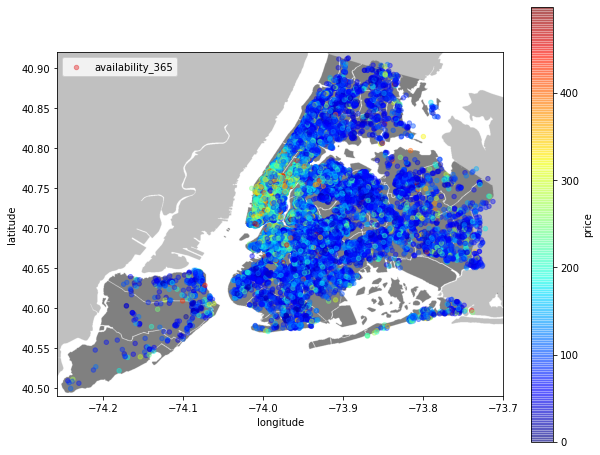

In [22]:
import urllib
#initializing the figure size
plt.figure(figsize=(10,8))
#loading the png NYC image found on Google and saving to my local folder along with the project
i=urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/e/ec/Neighbourhoods_New_York_City_Map.PNG')
nyc_img=plt.imread(i)
#scaling the image based on the latitude and longitude max and mins for proper output
plt.imshow(nyc_img,zorder=0,extent=[-74.258, -73.7, 40.49,40.92])
ax=plt.gca()
#using scatterplot again
sub_6.plot(kind='scatter', x='longitude', y='latitude', label='availability_365', c='price', ax=ax, 
           cmap=plt.get_cmap('jet'), colorbar=True, alpha=0.4, zorder=5)

plt.legend()
plt.show()

After scaling our image the best we can, we observe that we end up with a very immersive heatmap. Using latitude and longitude points were able to visualize all NYC listings. Also, we added a color-coded range for each point on the map based on the price of the listing. However, it is important to note that we had to drop some extremely high values as they are treated as outliers for our analysis.

Text(0.5, 1.0, 'Price Distribution Plot')

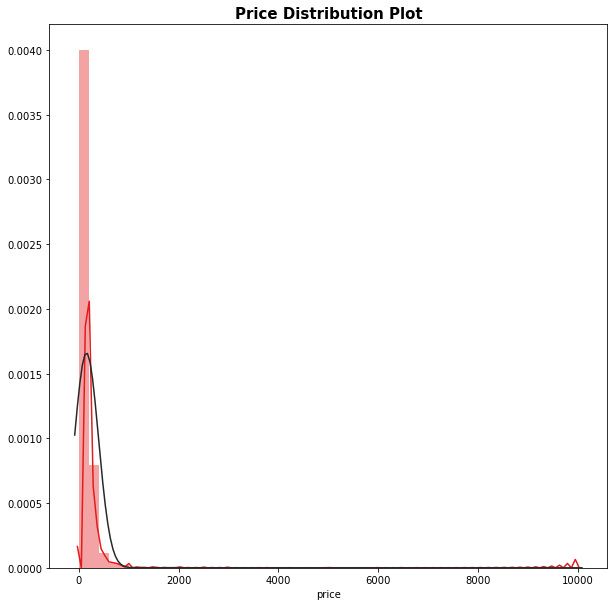

In [23]:
plt.figure(figsize=(10,10))
sns.distplot(nyc_data['price'], fit=norm)
plt.title("Price Distribution Plot",size=15, weight='bold')

The above distribution graph shows that there is a right-skewed distribution on price. This means there is a positive skewness. Log transformation will be used to make this feature less skewed. This will help to make easier interpretation and better statistical analysis

Since division by zero is a problem, log+1 transformation would be better.

In [24]:
nyc_data['price_log'] = np.log(nyc_data.price+1)

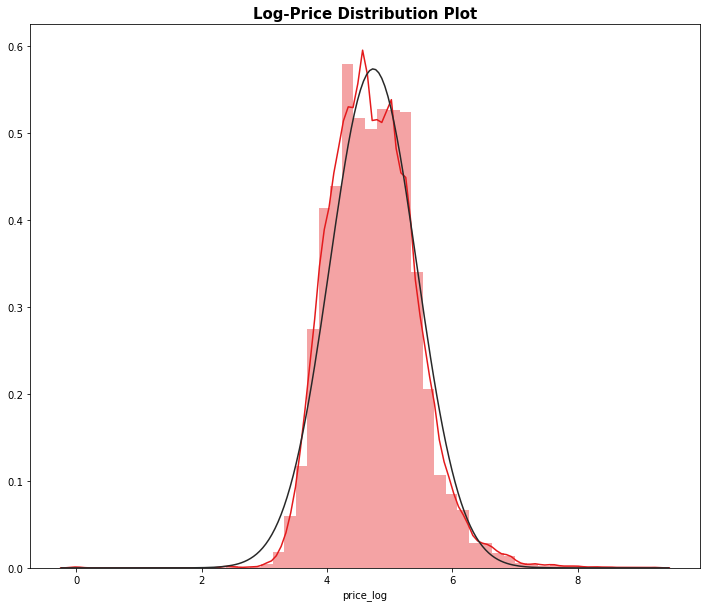

In [25]:
plt.figure(figsize=(12,10))
sns.distplot(nyc_data['price_log'], fit=norm)
plt.title("Log-Price Distribution Plot",size=15, weight='bold')
plt.show()

## Multicollinearity

Multicollinearity will help to measure the relationship between explanatory variables in multiple regression. If there is multicollinearity occurs, these highly related input variables should be eliminated from the model.

In this kernel, multicollinearity will be control with Eigen vector values results.

In [26]:
#Eigen vector of a correlation matrix.

mean = nyc_data['reviews_per_month'].mean()
corr=nyc_data.corr(method='pearson')
multicollinearity, V=np.linalg.eig(corr)
multicollinearity


array([1.88077542, 1.94050008, 1.634899  , 0.23788366, 0.32659394,
       0.41850772, 1.19230211, 1.05330098, 0.63654962, 0.80614149,
       0.87254598])

None one of the eigenvalues of the correlation matrix is close to zero. It means that there is no multicollinearity exists in the data.

### Feature Selection and GridSearch

First, Standard Scaler technique will be used to normalize the data set. Thus, each feature has 0 mean and 1 standard deviation.

In [27]:
nyc_data.head()

,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log
0,2539,2787,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,0.21,6,365,5.010635
1,2595,2845,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,0.38,2,355,5.420535
2,3647,4632,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,0.00,1,365,5.017280
3,3831,4869,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,4.64,1,194,4.499810
4,5022,7192,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,0.10,1,0,4.394449


Creating Dummmy Variables for Columns Neighbourhood and Room_types

In [28]:
#Creating dummies for Neighbourhood

dummies=pd.get_dummies(nyc_data['neighbourhood'], drop_first = True)
for i in dummies.columns:
    nyc_data['neighbourhood'+'_'+str(i)]=dummies[i]
nyc_data.drop(columns={'neighbourhood'},inplace=True)

#Creating Dummies for Room_type

dummies=pd.get_dummies(nyc_data['room_type'],drop_first=True)
for i in dummies.columns:
    nyc_data['room_type'+'_'+str(i)]=dummies[i]
nyc_data.drop(columns={'room_type'},inplace=True)


In [29]:
nyc_data.head()

,id,host_id,neighbourhood_group,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
0,2539,2787,Brooklyn,40.64749,-73.97237,149,1,9,0.21,6,...,0,0,0,0,0,0,0,0,1,0
1,2595,2845,Manhattan,40.75362,-73.98377,225,1,45,0.38,2,...,0,0,0,0,0,0,0,0,0,0
2,3647,4632,Manhattan,40.80902,-73.94190,150,3,0,0.00,1,...,0,0,0,0,0,0,0,0,1,0
3,3831,4869,Brooklyn,40.68514,-73.95976,89,1,270,4.64,1,...,0,0,0,0,0,0,0,0,0,0
4,5022,7192,Manhattan,40.79851,-73.94399,80,10,9,0.10,1,...,0,0,0,0,0,0,0,0,0,0


In [30]:
nyc_data.info

<bound method DataFrame.info of              id   host_id neighbourhood_group  latitude  longitude  price  \
0          2539      2787            Brooklyn  40.64749  -73.97237    149   
1          2595      2845           Manhattan  40.75362  -73.98377    225   
2          3647      4632           Manhattan  40.80902  -73.94190    150   
3          3831      4869            Brooklyn  40.68514  -73.95976     89   
4          5022      7192           Manhattan  40.79851  -73.94399     80   
...         ...       ...                 ...       ...        ...    ...   
48890  36484665   8232441            Brooklyn  40.67853  -73.94995     70   
48891  36485057   6570630            Brooklyn  40.70184  -73.93317     40   
48892  36485431  23492952           Manhattan  40.81475  -73.94867    115   
48893  36485609  30985759           Manhattan  40.75751  -73.99112     55   
48894  36487245  68119814           Manhattan  40.76404  -73.98933     90   

       minimum_nights  number_of_reviews  r

## Visualizing Train Data Set

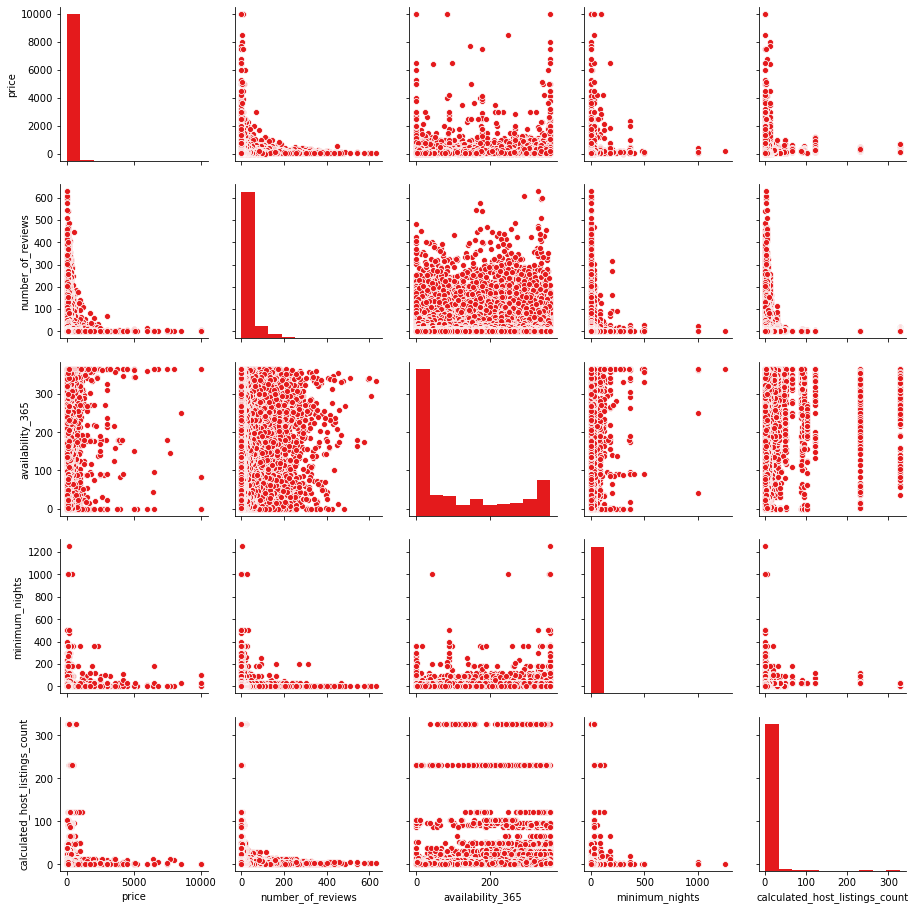

In [31]:
# Pair plots between numeric variables.
sns.pairplot(nyc_data[['price','number_of_reviews','availability_365','minimum_nights', 'calculated_host_listings_count']])
plt.show()

In [32]:
from sklearn.feature_selection import RFE

### NOW LET SEE HOW COUNT VARIES WITH DIFFERENT FEATURES.

In [33]:
nyc_model = nyc_data.drop(columns=['host_id','latitude','longitude','neighbourhood_group',]) 
                                   
nyc_model.isnull().sum()

id                        0
price                     0
minimum_nights            0
number_of_reviews         0
reviews_per_month         0
                         ..
neighbourhood_Woodlawn    0
neighbourhood_Woodrow     0
neighbourhood_Woodside    0
room_type_Private room    0
room_type_Shared room     0
Length: 230, dtype: int64

In [34]:
nyc_model.head()

,id,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,price_log,neighbourhood_Arden Heights,neighbourhood_Arrochar,...,neighbourhood_Williamsbridge,neighbourhood_Williamsburg,neighbourhood_Willowbrook,neighbourhood_Windsor Terrace,neighbourhood_Woodhaven,neighbourhood_Woodlawn,neighbourhood_Woodrow,neighbourhood_Woodside,room_type_Private room,room_type_Shared room
0,2539,149,1,9,0.21,6,365,5.010635,0,0,...,0,0,0,0,0,0,0,0,1,0
1,2595,225,1,45,0.38,2,355,5.420535,0,0,...,0,0,0,0,0,0,0,0,0,0
2,3647,150,3,0,0.00,1,365,5.017280,0,0,...,0,0,0,0,0,0,0,0,1,0
3,3831,89,1,270,4.64,1,194,4.499810,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5022,80,10,9,0.10,1,0,4.394449,0,0,...,0,0,0,0,0,0,0,0,0,0


### Multicollinearity

Multicollinearity will help to measure the relationship between explanatory variables in multiple regression. If there is multicollinearity occurs, these highly related input variables should be eliminated from the model.

In this kernel, multicollinearity will be control with Eigen vector values results.

In [35]:
nyc_model_x, nyc_model_y = nyc_model.iloc[:,:-1], nyc_model.iloc[:,-1]

In [36]:
#Eigen vector of a correlation matrix.
multicollinearity, V=np.linalg.eig(corr)
multicollinearity

array([1.88077542, 1.94050008, 1.634899  , 0.23788366, 0.32659394,
       0.41850772, 1.19230211, 1.05330098, 0.63654962, 0.80614149,
       0.87254598])

In [37]:
X_train, X_test, y_train, y_test = train_test_split(nyc_model_x, nyc_model_y, test_size=0.3,random_state=42)

### Performing Simple Linear Regression

Equation of linear regression 𝑦=𝑐+𝑚1𝑥1+𝑚2𝑥2+...+𝑚𝑛𝑥𝑛 𝑦 is the response 𝑐 is the intercept 𝑚1 is the coefficient for the first feature 𝑚𝑛 is the coefficient for the nth feature In our case:


### Two Main Charaters defining Feature Selections are:-
1. p-value
2. VIFs

### p-value
Hypothesis testing is that a feature is insignificant in the model and by having p-value less than 0.05, we reject this hypothesis and hence the feature is selected. So wherever the p-value of a feature is higher than 0.05, it indicates that we failed to reject the hypothesis

### VIFs
When there is a feature in the model that can be explained by other features, then the variable's VIF will be higher than 5 and we can eliminate those variables.

### Strategies to Utilise:-

1. When a feature has high p-value and high VIF, then it can be dropped first.
2. When a feature has high p-value and low VIF, then we will drop it as it is not significant.
3. When a feature has low p-value and high VIF, we try to drop other features which have higher p-value and if there is none, we will remove this feature and build the model and check the R-squared.
4. When a feature has low p-value and low VIF, then it is significant and not explained by other features and hence we keep these features in the model.

In [38]:
### Linear Regression ###

def linear_reg(input_x, input_y, cv=5):
    ## Defining parameters
    model_LR= LinearRegression()

    parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

    ## Building Grid Search algorithm with cross-validation and Mean Squared Error score.

    grid_search_LR = GridSearchCV(estimator=model_LR,  
                         param_grid=parameters,
                         scoring='neg_mean_squared_error',
                         cv=cv,
                         n_jobs=-1)

    ## Lastly, finding the best parameters.

    grid_search_LR.fit(input_x, input_y)
    best_parameters_LR = grid_search_LR.best_params_  
    best_score_LR = grid_search_LR.best_score_ 
    print(best_parameters_LR)
    print(best_score_LR)


# linear_reg(nyc_model_x, nyc_model_y)

In [39]:
# Model Prediction

##Linear Regression
lr = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr.fit(X_train, y_train)
lr_pred= lr.predict(X_test)


In [40]:
###Linear Regression
lr_x = LinearRegression(copy_X= True, fit_intercept = True, normalize = True)
lr_x.fit(X_train, y_train)
lr_pred_x= lr_x.predict(X_test)

In [41]:
print('-------------Lineer Regression-----------')

print('--Phase-1--')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred)))   
print('R2 %f' % r2_score(y_test, lr_pred))

print('--Phase-2--')
print('MAE: %f'% mean_absolute_error(y_test, lr_pred_x))
print('RMSE: %f'% np.sqrt(mean_squared_error(y_test, lr_pred_x)))   
print('R2 %f' % r2_score(y_test, lr_pred_x))

-------------Lineer Regression-----------
--Phase-1--
MAE: 0.064092
RMSE: 0.138707
R2 0.162250
--Phase-2--
MAE: 0.064092
RMSE: 0.138707
R2 0.162250


The results show that the model have similar prediction results. Phase 1 and 2 have a great difference for the metric. All metric values are increased in Phase 2 it means, the prediction error value is higher in that Phase and model explainability are very low the variability of the response data around mean.

1. The MAE value of 0 indicates no error on the model. In other words, there is a perfect prediction. The above results show that all predictions have great error especially in phase 2.
2. RMSE gives an idea of how much error the system typically makes in its predictions. The above results show that all models with each phase have significant errors.
3. R2 represents the proportion of the variance for a dependent variable that's explained by an independent variable. 4. The above results show that, in phase 1, 13.8% of data fit the regression model and in phase 2, 13.8% of data fit the regression model.

Text(0.5, 1.0, 'Linear Regression - Phase-2')

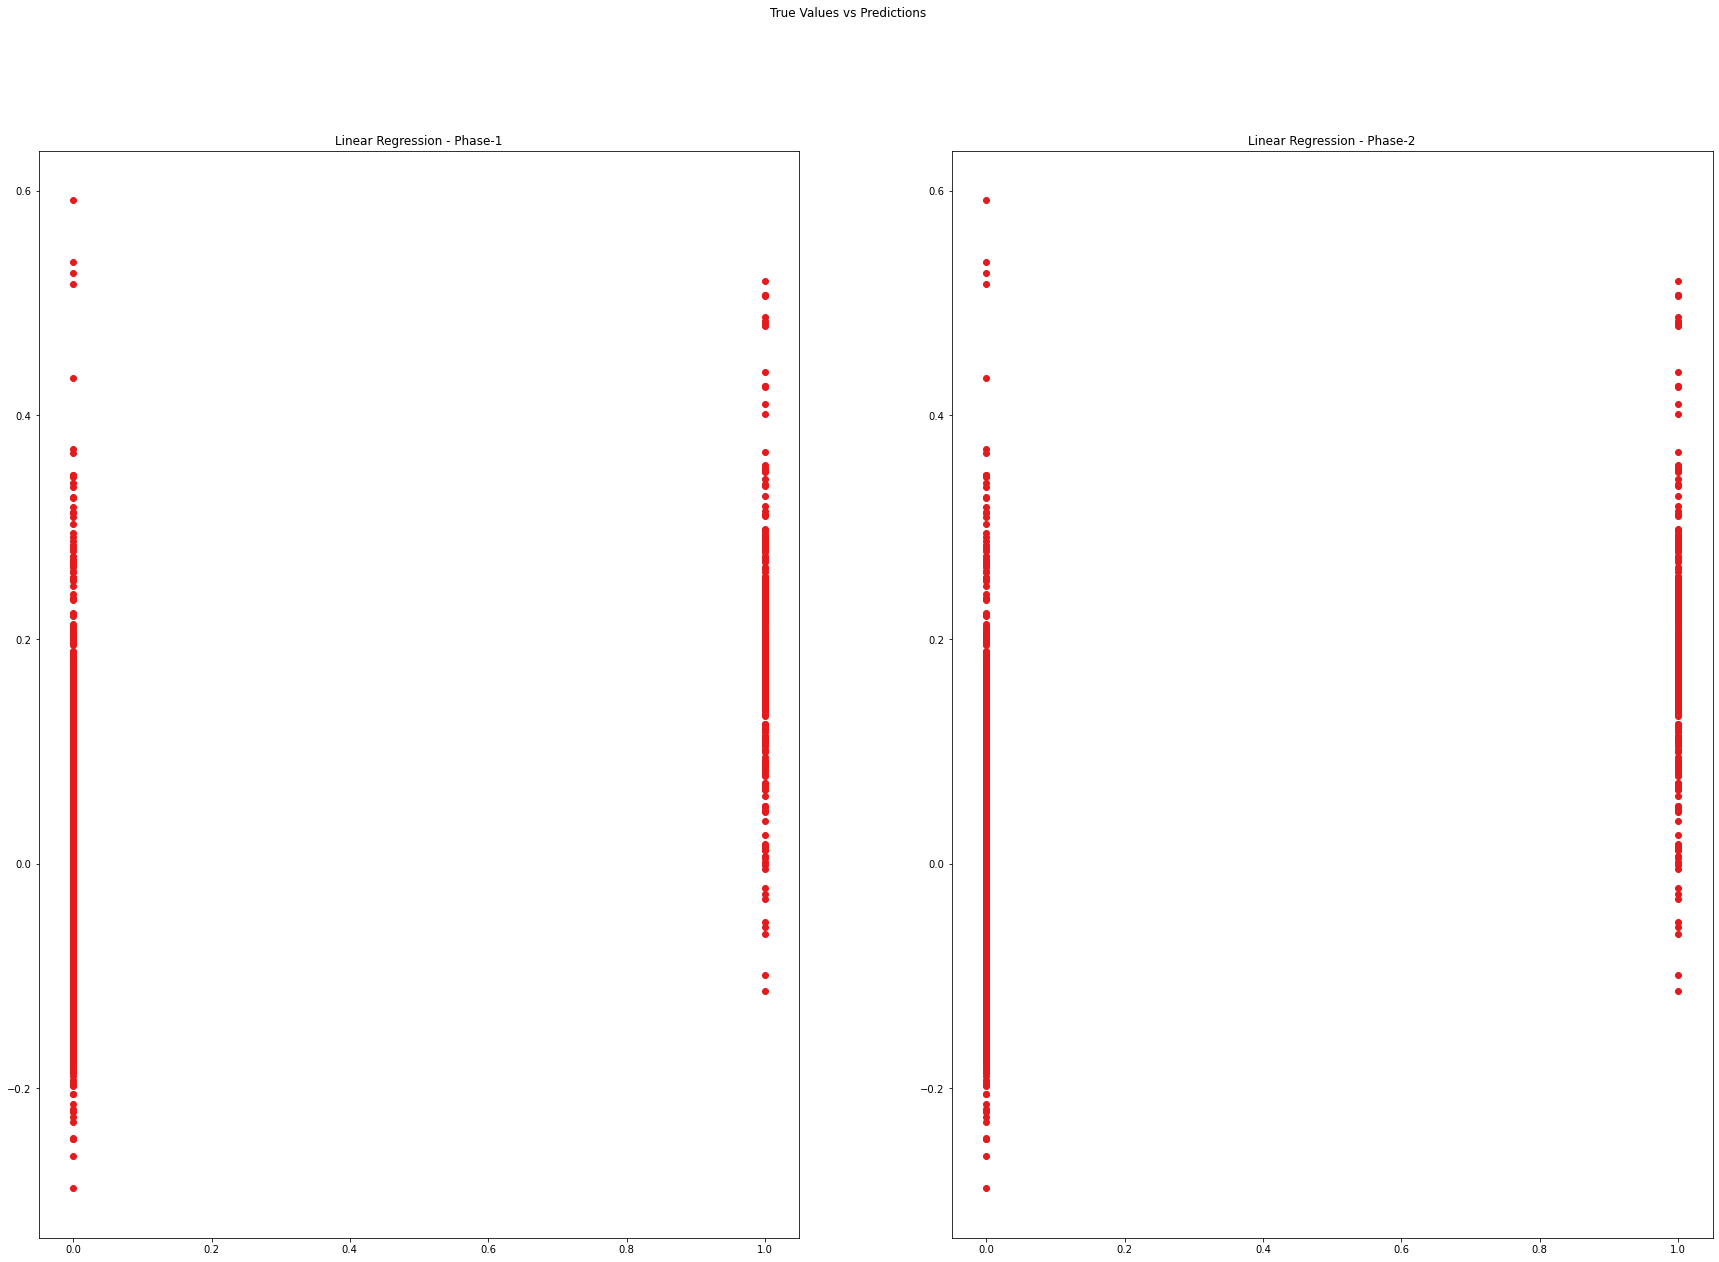

In [42]:
fig, ((ax1), (ax5)) = plt.subplots(1,2, figsize=(30, 20))
fig.suptitle('True Values vs Predictions')
fig.suptitle('True Values vs Predictions')

ax1.scatter(y_test, lr_pred)
ax1.set_title('Linear Regression - Phase-1')

ax5.scatter(y_test, lr_pred_x)
ax5.set_title('Linear Regression - Phase-2')

## Conclusion


Summarizing our findings, suggesting other features
This Airbnb ('AB_NYC_2019') dataset for the 2019 year appeared to be a very rich dataset with a variety of columns that allowed us to do deep data exploration on each significant column presented. First, we have found hosts that take good advantage of the Airbnb platform and provide the most listings; we found that our top host has 327 listings. After that, we proceeded with analyzing boroughs and neighborhood listing densities and what areas were more popular than another. Next, we put good use of our latitude and longitude columns and used to create a geographical heatmap color-coded by the price of listings. Further, we came back to the first column with name strings and had to do a bit more coding to parse each title and analyze existing trends on how listings are named as well as what was the count for the most used words by hosts. Lastly, we found the most reviewed listings and analyzed some additional attributes. For our data exploration purposes, it also would be nice to have couple additional features, such as positive and negative numeric (0-5 stars) reviews or 0-5 star average review for each listing; addition of these features would help to determine the best-reviewed hosts for NYC along with 'number_of_review' column that is provided. Overall, we discovered a very good number of interesting relationships between features and explained each step of the process. This data analytics is very much mimicked on a higher level on Airbnb Data/Machine Learning team for better business decisions, control over the platform, marketing initiatives, implementation of new features and much more. Therefore, I hope this kernel helps everyone!